In [1]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importamos el dataset
data = pd.read_csv('tableau_project.csv')

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 2000)

In [4]:
data.shape

(3864, 22)

In [5]:
data.head()

,Unnamed: 0,journey_id,vehicle_type_id,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,price,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating
0,0,93e6d216088af74c32183283d4bb2953,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:08:59,19.431363,-99.195362,2017-12-16 11:37:32,19.406438,-99.175260,drop off,"5,866","5,204",0,"7,943","1,058",Android,590,48,662,0,9.0
1,1,444b084ec64244919afadfba879876a3,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:06:16,19.431567,-99.195368,2017-12-16 11:07:21,NaN,NaN,rider cancel,0,0,0,0,0,iPhone,NaN,NaN,0,0,9.0
2,2,dbcc57f4e7606a71c74c6e4666a977a4,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 22:58:37,19.422052,-99.174499,2017-11-24 23:27:05,19.438666,-99.180821,drop off,"4,000","3,552",0,"3,054",689,Android,923,4,0,0,10.0
3,3,1ffe9a24033847148c683574985df56c,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 09:17:08,19.433119,-99.154844,2017-12-16 09:17:30,19.290148,-99.144407,rider cancel,0,0,0,0,0,iPhone,NaN,NaN,0,0,9.0
4,4,fb1ef7d070724482a33be41f27737ea5,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 18:11:00,19.440996,-99.183581,2017-11-24 18:31:31,19.422815,-99.174865,drop off,"4,000","2,974",12,"2,859",887,iPhone,329,36,0,0,8.0


In [6]:
# pandas_profiling.ProfileReport(data)

In [7]:
# eliminar los viajes cancelados. nos quedamos solo con los viajes llevados a cabo
data = data[data['end_state'] == 'drop off']
data.shape

(2685, 22)

In [8]:
# contar nulls
null_cols = data.isnull().sum()
null_cols

Unnamed: 0              0
journey_id              0
vehicle_type_id         0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                  0
end_lat                47
end_lon                47
end_state               0
price                   0
price_distance          0
price_duration          0
distance                0
duration                0
source                  0
rider_waiting_time      0
driver_waiting_time     0
price_supplements       0
discount                0
rating                  0
dtype: int64

In [9]:
# vamos a eliminar los registros que no tienen lugar de destino del viaje
data = data[pd.notnull(data['end_lat'])]
data.shape

(2638, 22)

In [10]:
null_cols = data.isnull().sum()
null_cols

Unnamed: 0             0
journey_id             0
vehicle_type_id        0
start_type             0
start_at               0
start_lat              0
start_lon              0
end_at                 0
end_lat                0
end_lon                0
end_state              0
price                  0
price_distance         0
price_duration         0
distance               0
duration               0
source                 0
rider_waiting_time     0
driver_waiting_time    0
price_supplements      0
discount               0
rating                 0
dtype: int64

In [11]:
# hay variables numéricas como categóricas
# los precios contienen comas en vez de puntos, por lo que hay que hacer replace
# no me cuadran en pesos ni en dólares. podría ser que estuvieran en céntimos de peso
def price_to_float(s):
    return float(s.replace(',', ''))/100

# parece que la distancia está en km, pero tiene una coma
# vamos a quitar la coma y a convertirlo en int
def distance_to_int(s):
    return float(s.replace(',', '.'))

# parece que la duración de los trayectos está en segundos, la vamos a pasar a minutos
def duration_to_min(s):
    return float(s.replace(',', ''))/60

In [12]:
# aplicamos la función para cambiar los precios
lst_price = ['price', 'price_distance', 'price_duration', 'price_supplements', 'discount']
for column in lst_price:
    data[column] = data[column].map(price_to_float)

data.head()

,Unnamed: 0,journey_id,vehicle_type_id,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,price,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating
0,0,93e6d216088af74c32183283d4bb2953,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:08:59,19.431363,-99.195362,2017-12-16 11:37:32,19.406438,-99.175260,drop off,58.66,52.04,0.00,"7,943","1,058",Android,590,48,6.62,0.0,9.0
2,2,dbcc57f4e7606a71c74c6e4666a977a4,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 22:58:37,19.422052,-99.174499,2017-11-24 23:27:05,19.438666,-99.180821,drop off,40.00,35.52,0.00,"3,054",689,Android,923,4,0.00,0.0,10.0
4,4,fb1ef7d070724482a33be41f27737ea5,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 18:11:00,19.440996,-99.183581,2017-11-24 18:31:31,19.422815,-99.174865,drop off,40.00,29.74,0.12,"2,859",887,iPhone,329,36,0.00,0.0,8.0
5,5,310f2f7103dd41c9811bffa771776648,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 15:34:53,19.421856,-99.174361,2017-11-24 15:53:30,19.440311,-99.184146,drop off,40.00,33.46,2.90,"3,176","1,028",iPhone,73,369,0.00,0.0,8.0
7,7,643a2da9e5f9457ab4a1706875c92d10,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 15:09:29,19.419962,-99.171955,2017-11-24 15:47:42,19.441434,-99.183503,drop off,64.49,43.67,20.82,"3,008","1,505",iPhone,770,799,0.00,0.0,10.0


In [13]:
# vemos si hay registros con precio 0
noprice = data[data['price'] == 0]
print(len(noprice))
noprice.head()

3


,Unnamed: 0,journey_id,vehicle_type_id,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,price,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating
919,919,8ad5e46e06566d8fc9ff06cf15be71f0,21620ea5749f2e0679a8c72c7fbafb9e,asap,2017-06-07 12:58:33,19.438148,-99.181069,2017-06-07 13:05:32,19.422749,-99.174937,drop off,0.0,9.61,0.53,"1,071",394,Android,15,51,0.0,0.0,9.0
2809,2809,a73e8dc2a6264e80b95e3b709828623e,21620ea5749f2e0679a8c72c7fbafb9e,asap,2017-05-23 12:53:31,19.356000,-99.275269,2017-05-23 13:50:20,19.441356,-99.183848,drop off,0.0,110.87,0.00,"9,483","2,149",iPhone,"1,235",5,0.0,0.0,9.0
2972,2972,2d7b639b59b14565987ff1e83f6aaf2a,21620ea5749f2e0679a8c72c7fbafb9e,asap,2017-04-21 18:03:56,19.425436,-99.178435,2017-04-21 18:16:44,19.415074,-99.170272,drop off,0.0,0.26,0.00,415,421,iPhone,317,21,0.0,0.0,9.0


In [14]:
# eliminamos las filas que tengan precio 0
data = data[data['price'] != 0]
data.shape

(2635, 22)

In [15]:
# aplicamos la función a la distancia
data['distance'] = data['distance'].map(distance_to_int)

In [16]:
# aplicamos la función para pasar los tiempos de segundos a minutos
lst_time = ['duration', 'rider_waiting_time', 'driver_waiting_time']
for column in lst_time:
    data[column] = data[column].map(duration_to_min)

In [17]:
# creamos columna con distance / price_distance
# creamos columna con duration / price_duration
data['price_per_km'] = data['price_distance'] / data['distance']
data['price_per_min'] = data['price_duration'] / data['duration']

In [18]:
data.head()

,Unnamed: 0,journey_id,vehicle_type_id,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,price,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating,price_per_km,price_per_min
0,0,93e6d216088af74c32183283d4bb2953,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:08:59,19.431363,-99.195362,2017-12-16 11:37:32,19.406438,-99.175260,drop off,58.66,52.04,0.00,7.943,17.633333,Android,9.833333,0.800000,6.62,0.0,9.0,6.551681,0.000000
2,2,dbcc57f4e7606a71c74c6e4666a977a4,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 22:58:37,19.422052,-99.174499,2017-11-24 23:27:05,19.438666,-99.180821,drop off,40.00,35.52,0.00,3.054,11.483333,Android,15.383333,0.066667,0.00,0.0,10.0,11.630648,0.000000
4,4,fb1ef7d070724482a33be41f27737ea5,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 18:11:00,19.440996,-99.183581,2017-11-24 18:31:31,19.422815,-99.174865,drop off,40.00,29.74,0.12,2.859,14.783333,iPhone,5.483333,0.600000,0.00,0.0,8.0,10.402239,0.008117
5,5,310f2f7103dd41c9811bffa771776648,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 15:34:53,19.421856,-99.174361,2017-11-24 15:53:30,19.440311,-99.184146,drop off,40.00,33.46,2.90,3.176,17.133333,iPhone,1.216667,6.150000,0.00,0.0,8.0,10.535264,0.169261
7,7,643a2da9e5f9457ab4a1706875c92d10,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 15:09:29,19.419962,-99.171955,2017-11-24 15:47:42,19.441434,-99.183503,drop off,64.49,43.67,20.82,3.008,25.083333,iPhone,12.833333,13.316667,0.00,0.0,10.0,14.517952,0.830033


In [19]:
# hay dos tipos de vehículos. vamos a ver si encontramos alguna relación con el precio
v_type = pd.pivot_table(data = data, values = ('price_per_km', 'price_per_min'), index = 'vehicle_type_id')
print(v_type)

                                  price_per_km  price_per_min
vehicle_type_id                                              
077866c3fd1a75f51ca7f8eae166ae32     11.487761       0.106010
21620ea5749f2e0679a8c72c7fbafb9e     11.382012       0.082633


In [20]:
# vemos que el precio por km es prácticamente igual en los dos tipos de vehículo
# sin embargo, en el precio por minuto sí que hay diferencia
# podríamos decir que puede que haya un vehículo con más plazas o de mayor categoría
# vamos a cambiar el id por car_a y car_b
def change_id(id):
    if id == '077866c3fd1a75f51ca7f8eae166ae32':
        return 'vehicle_a'
    elif id == '21620ea5749f2e0679a8c72c7fbafb9e':
        return 'vehicle_b'

In [21]:
data['vehicle_type_id'] = data['vehicle_type_id'].map(change_id)
data.head()

,Unnamed: 0,journey_id,vehicle_type_id,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,price,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating,price_per_km,price_per_min
0,0,93e6d216088af74c32183283d4bb2953,vehicle_a,asap,2017-12-16 11:08:59,19.431363,-99.195362,2017-12-16 11:37:32,19.406438,-99.175260,drop off,58.66,52.04,0.00,7.943,17.633333,Android,9.833333,0.800000,6.62,0.0,9.0,6.551681,0.000000
2,2,dbcc57f4e7606a71c74c6e4666a977a4,vehicle_a,asap,2017-11-24 22:58:37,19.422052,-99.174499,2017-11-24 23:27:05,19.438666,-99.180821,drop off,40.00,35.52,0.00,3.054,11.483333,Android,15.383333,0.066667,0.00,0.0,10.0,11.630648,0.000000
4,4,fb1ef7d070724482a33be41f27737ea5,vehicle_a,asap,2017-11-24 18:11:00,19.440996,-99.183581,2017-11-24 18:31:31,19.422815,-99.174865,drop off,40.00,29.74,0.12,2.859,14.783333,iPhone,5.483333,0.600000,0.00,0.0,8.0,10.402239,0.008117
5,5,310f2f7103dd41c9811bffa771776648,vehicle_a,asap,2017-11-24 15:34:53,19.421856,-99.174361,2017-11-24 15:53:30,19.440311,-99.184146,drop off,40.00,33.46,2.90,3.176,17.133333,iPhone,1.216667,6.150000,0.00,0.0,8.0,10.535264,0.169261
7,7,643a2da9e5f9457ab4a1706875c92d10,vehicle_a,asap,2017-11-24 15:09:29,19.419962,-99.171955,2017-11-24 15:47:42,19.441434,-99.183503,drop off,64.49,43.67,20.82,3.008,25.083333,iPhone,12.833333,13.316667,0.00,0.0,10.0,14.517952,0.830033


In [22]:
# vamos a eliminar las columnas que no nos hagan falta
data = data.drop(['Unnamed: 0', 'end_state'], axis=1)
data.head()

,journey_id,vehicle_type_id,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,price,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating,price_per_km,price_per_min
0,93e6d216088af74c32183283d4bb2953,vehicle_a,asap,2017-12-16 11:08:59,19.431363,-99.195362,2017-12-16 11:37:32,19.406438,-99.175260,58.66,52.04,0.00,7.943,17.633333,Android,9.833333,0.800000,6.62,0.0,9.0,6.551681,0.000000
2,dbcc57f4e7606a71c74c6e4666a977a4,vehicle_a,asap,2017-11-24 22:58:37,19.422052,-99.174499,2017-11-24 23:27:05,19.438666,-99.180821,40.00,35.52,0.00,3.054,11.483333,Android,15.383333,0.066667,0.00,0.0,10.0,11.630648,0.000000
4,fb1ef7d070724482a33be41f27737ea5,vehicle_a,asap,2017-11-24 18:11:00,19.440996,-99.183581,2017-11-24 18:31:31,19.422815,-99.174865,40.00,29.74,0.12,2.859,14.783333,iPhone,5.483333,0.600000,0.00,0.0,8.0,10.402239,0.008117
5,310f2f7103dd41c9811bffa771776648,vehicle_a,asap,2017-11-24 15:34:53,19.421856,-99.174361,2017-11-24 15:53:30,19.440311,-99.184146,40.00,33.46,2.90,3.176,17.133333,iPhone,1.216667,6.150000,0.00,0.0,8.0,10.535264,0.169261
7,643a2da9e5f9457ab4a1706875c92d10,vehicle_a,asap,2017-11-24 15:09:29,19.419962,-99.171955,2017-11-24 15:47:42,19.441434,-99.183503,64.49,43.67,20.82,3.008,25.083333,iPhone,12.833333,13.316667,0.00,0.0,10.0,14.517952,0.830033


In [23]:
a = pd.pivot_table(data = data, values = 'journey_id', index = 'distance', aggfunc = len)
print(a)

          journey_id
distance            
0.000              3
1.000              1
1.001              1
1.004              1
1.005              1
1.007              1
1.008              2
1.010              1
1.013              1
1.014              1
1.027              1
1.028              1
1.031              1
1.036              1
1.038              1
1.053              1
1.061              1
1.081              1
1.110              1
1.133              1
1.134              1
1.143              2
1.144              1
1.154              1
1.155              1
1.156              1
1.162              1
1.164              1
1.177              1
1.179              1
1.184              1
1.186              1
1.187              1
1.191              1
1.193              1
1.194              1
1.202              1
1.211              1
1.215              2
1.218              1
1.219              1
1.229              1
1.231              1
1.233              1
1.237              1
1.240        

In [24]:
# eliminamos registros con una velocidad media superior a 80 km/h
print(len(data))
data = data[data['distance'] / (data['duration'] / 60) < 80]
print(len(data))

2635
2552


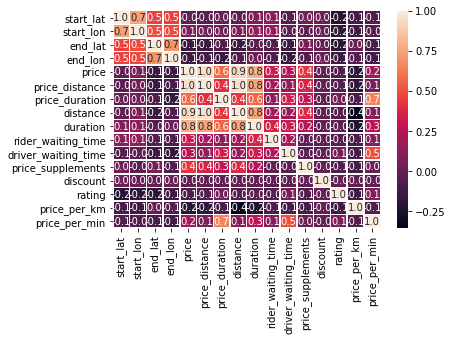

In [25]:
f,ax = plt.subplots()
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [26]:
# el dataset ya está limpio. ahora vamos a guardarlo como csv para llevarlo a Tableau
data.to_csv('tableau-project-clean.csv')